In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import tqdm as tqdm
import numpy as np
from dewpoint import *
from windspeed import *


import matplotlib.pyplot as plt

In [13]:
count = 2000
high_windspeed = mean_high_wind_dates(count)

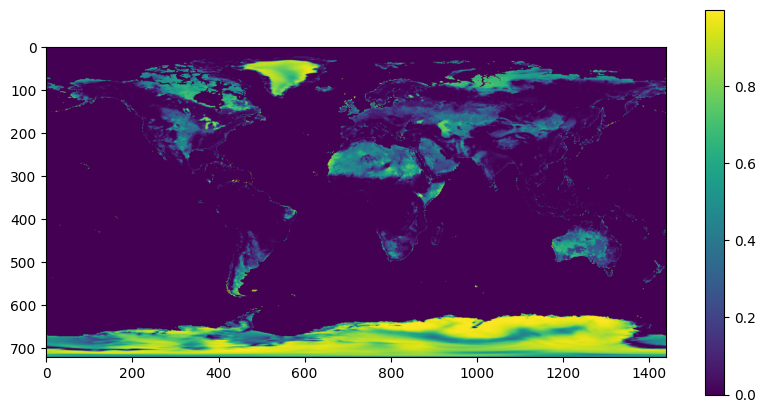

In [17]:
plt.figure(figsize=(10, 5))
plt.imshow(high_windspeed)
plt.colorbar()

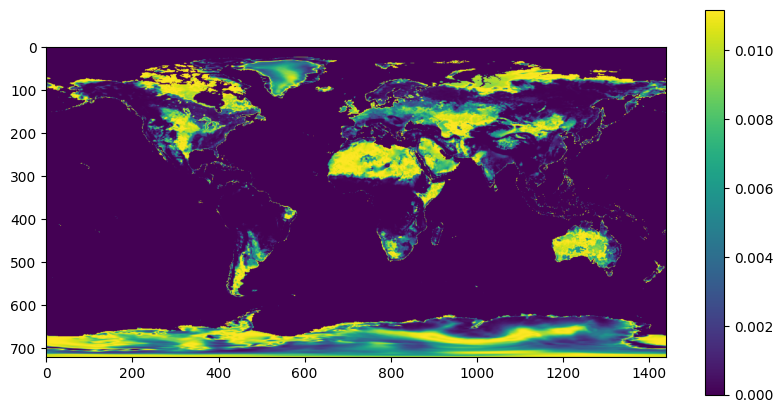

In [16]:
plt.figure(figsize=(10, 5))
plt.imshow(high_windspeed * (1 - high_windspeed) / np.sqrt(count) * 2)
plt.colorbar()

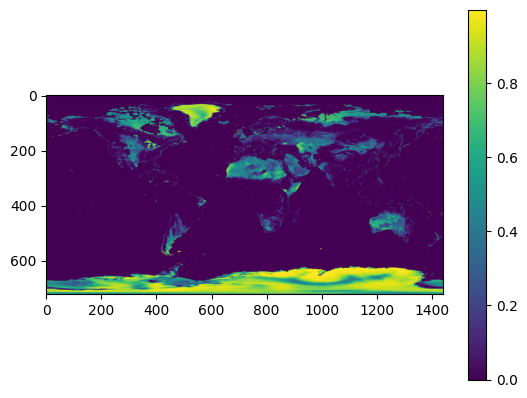

In [6]:
plt.imshow(results)
plt.colorbar()

In [3]:
# dewpoints = sampled_values(high_dewpoint_for_date, 1017)
winds_mean, winds_var = sampled_value_moments(mean_wind_speed_for_date, 2000)

NameError: name 'sampled_value_moments' is not defined

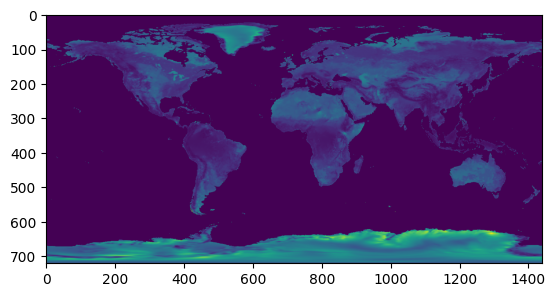

In [4]:
plt.imshow(winds_mean)

In [4]:
def boostrap_gap(arr, count):
    # approximate for now
    return arr.std(0) / np.sqrt(arr.shape[0]) * 4
    rng = np.random.RandomState(0)
    bootstrap_mean = np.array([arr[rng.choice(len(arr), len(arr), replace=True)].mean(0) for i in tqdm.trange(count)])
    lo, hi = np.percentile(bootstrap_mean, [2.5, 97.5], axis=0)
    return (hi - lo)

In [ ]:
ten_mph = 4.4704
plt.imshow(boostrap_gap(winds > ten_mph, 120), vmax=0.08)
plt.colorbar()
plt.show()

In [23]:
bootstrap_raw = boostrap_gap(dewpoints, 120)

In [9]:
winds_var ** 0.5

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.70256293, 1.70162355, 1.70067457, ..., 1.70158361, 1.70221763,
        1.70256293],
       [1.67638197, 1.67566393, 1.67471768, ..., 1.67451311, 1.67574596,
        1.67638197],
       [2.57756028, 2.57756028, 2.57756028, ..., 2.57756028, 2.57756028,
        2.57756028]], shape=(721, 1440))

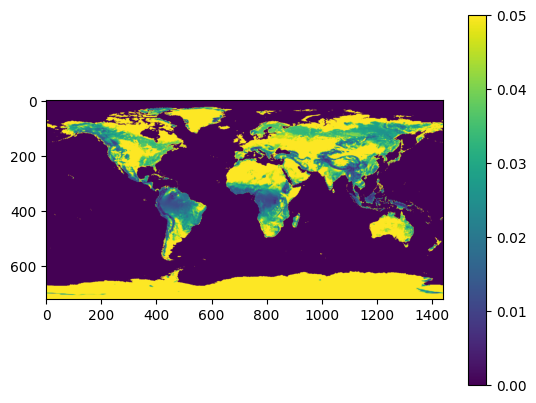

In [13]:
plt.imshow(winds_var ** 0.5 / np.sqrt(2000) * 2, vmin=0, vmax=0.05)
plt.colorbar()

In [8]:
# > 70F == > 294.261K
dewpt_over_70 = dewpoints > 294.261


In [9]:
bootstrap_over_70 = boostrap_gap(dewpt_over_70, 120)

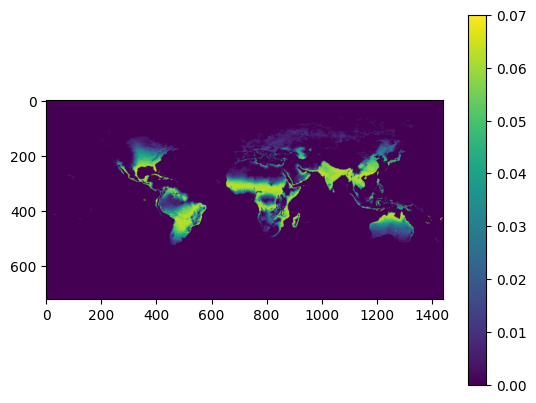

In [12]:
plt.imshow(bootstrap_over_70, vmin=0, vmax=0.07)
plt.colorbar()

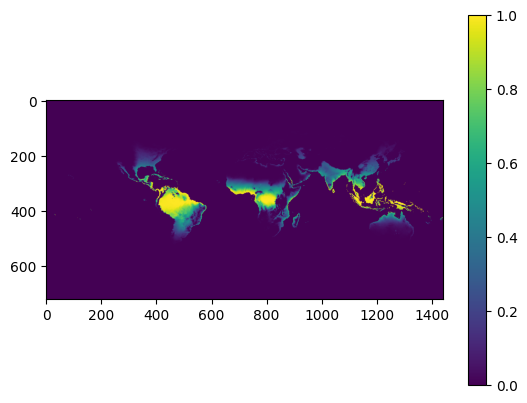

In [62]:
plt.imshow(dewpt_over_70.mean(0))
plt.colorbar()

In [50]:
gap[100, 1300]

np.float64(9.439536590576154)

(array([32., 45., 59., 38., 42., 39., 40., 52., 58., 35.]),
 array([229.7142334 , 235.36008301, 241.00593262, 246.65178223,
        252.29763184, 257.94348145, 263.58933105, 269.23518066,
        274.88103027, 280.52687988, 286.17272949]),
 <BarContainer object of 10 artists>)

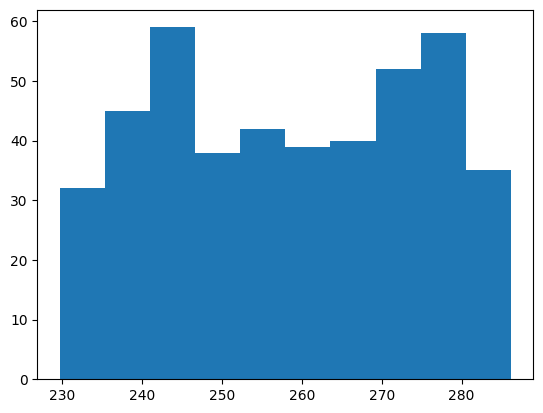

In [51]:
plt.hist(dewpoints[:, 100, 1300])

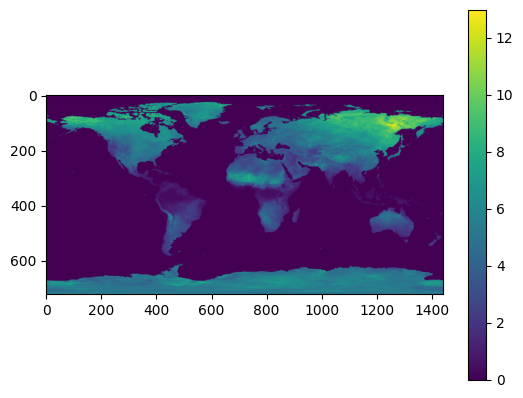

In [30]:
plt.imshow(gap)
plt.colorbar()

In [15]:
dewpoints.size / 1e9

0.0571032